<a href="https://colab.research.google.com/github/SanjanaTikare117/Deep-Learning-Brain-MRI-Tumor-Detection/blob/main/BRAIN_MRI_FOR_BRAIN_TUMOR_DETECTION_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UPLOAD FILES**

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


**MOVE KAGGLE API KEY**

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 99% 15.0M/15.1M [00:00<00:00, 156MB/s]
100% 15.1M/15.1M [00:00<00:00, 155MB/s]


LOAD THE DATA

In [ ]:
#Tensorflow and zip file imports
import tensorflow as tf
from zipfile import ZipFile
#File handling and image processing libraries
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
#Data preprocessing and splitting libraries
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#keras models
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

<ipython-input-3-a0106538900e>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


**EXTRACT THE CONTENTS OF ZIP FILE**

In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**DATA PREPROCESSING AND BINARY CLASSIFICATION**

In [ ]:
os.chdir('/content/yes')# Binary Classification carried out
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

**VISUALISE AND PLOT THE IMAGE**

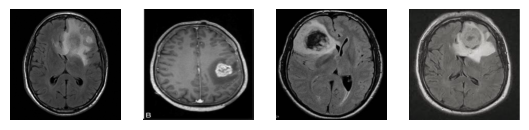

In [ ]:
%matplotlib inline#plot the images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 6, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

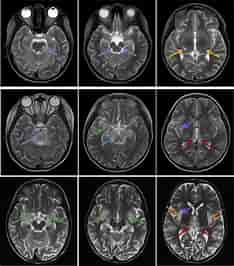

In [ ]:
from IPython.display import Image, display
image_path = '/content/brain image mri.jpeg'
display(Image(filename=image_path, width=500))

**TRAINING AND TESTING THE DATA**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Path to the dataset
data_path = '/content/yes'

# Initialize lists to store data
X = []
y = []

# Read images and labels
for filename in os.listdir(data_path):
    img_path = os.path.join(data_path, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize images to a consistent size
    X.append(img)

    # Assuming 'yes' indicates the presence of a tumor
    label = 1 if 'yes' in filename.lower() else 0
    y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the shape of X_train and X_test
print("Number of samples in X_train: ", len(X_train))
print("Number of samples in X_test: ", len(X_test))

# shape of the first image in X_train and X_test
if len(X_train) > 0:
    print("Shape of an image in X_train: ", X_train[0].shape)
else:
    print("X_train is empty")

if len(X_test) > 0:
    print("Shape of an image in X_test: ", X_test[0].shape)
else:
    print("X_test is empty")


Number of samples in X_train:  103
Number of samples in X_test:  52
Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
data = np.array(data)
data.shape

(0,)

In [ ]:
y_train.shape

(103,)

In [ ]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

**SAMPLE PREDICITIONS**

In [ ]:
sample_prediction = model.predict(np.array([X_test[0]]))# Calculating Sample Predicitions for given data
print("Sample Prediction Probabilities:", sample_prediction)
predicted_class = np.argmax(sample_prediction)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 2s 2s/step
Sample Prediction Probabilities: [[9.56528766e-07 1.18886792e-05 3.98787506e-06 9.68298446e-06
  5.65116238e-07 1.91166437e-05 1.11087347e-05 4.66694445e-07
  3.48366598e-07 1.60607470e-07 1.71192070e-07 1.05219374e-06
  2.03072477e-06 7.55813289e-07 2.36761434e-06 5.25677365e-07
  2.93999364e-07 1.16630952e-06 6.96734475e-08 4.35409038e-06
  3.20399778e-07 8.05243019e-07 1.90947759e-07 1.06155056e-07
  3.21390553e-06 1.35683456e-06 6.59446823e-06 2.55620307e-06
  3.21431617e-06 4.49704260e-07 1.81285805e-06 6.61374679e-06
  3.40931592e-06 2.64338155e-06 3.66513450e-06 1.80332938e-06
  9.56617714e-06 1.20645541e-06 2.78224434e-06 1.16010668e-07
  5.74828255e-06 1.27192266e-06 2.14051511e-07 1.16011797e-05
  2.88432398e-06 3.50715339e-07 2.77136564e-06 2.56873727e-06
  8.81549056e-08 1.30712431e-06 1.73754852e-05 8.34259117e-06
  3.80784732e-05 1.29389036e-05 1.92901825e-05 9.88277316e-06
  1.02766683e-06 3.28372630e-06 1.34930078e-05 6.

**IMPORT VGG16 MODEL ARCHITECTURE**

In [ ]:
from keras.applications import vgg16 #Pre-trained models for various applications

**Vgg16 MODEL FOR IMAGE CLASSIFICATION AND MODEL PREDICITIONS**

In [ ]:
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load the VGG16 model pre-trained on ImageNet data
model = vgg16.VGG16(weights='imagenet')

# Load and preprocess an image
img_path = '/content/brain image mri.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get model predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 1s 781ms/step
1: spotlight (0.55)
2: bolo_tie (0.23)
3: buckle (0.04)


 A BAR PLOT FOR TUMOR AND NORMAL SAMPLES

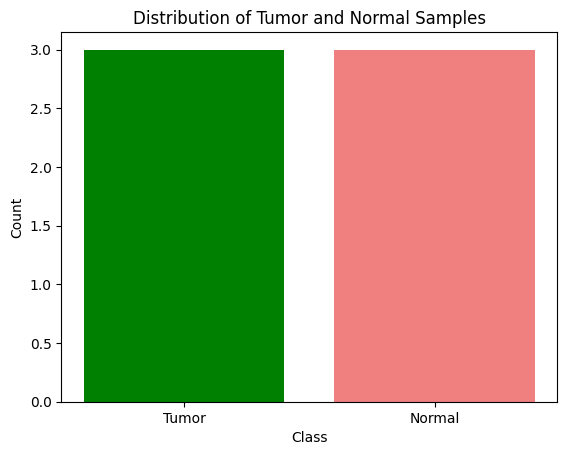

In [ ]:
result = np.array([[1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1]])


tumor_count = np.sum(result[:, 0] == 1)
normal_count = np.sum(result[:, 1] == 1)

#label counts
labels = ['Tumor', 'Normal']
counts = [tumor_count, normal_count]

#assign colors
colors = ['Green', 'lightcoral']
#plot the bar graph
plt.bar(labels, counts, color=colors)
plt.title('Distribution of Tumor and Normal Samples')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


PIE CHART OF TUMOR AND NORMAL CELLS

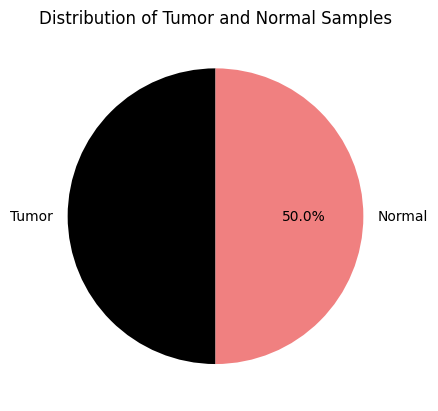

In [ ]:
total_samples = len(result)
tumor_percentage = (tumor_count / total_samples) * 100
normal_percentage = (normal_count / total_samples) * 100

# assign labels and counts
labels = ['Tumor', 'Normal']
counts = [tumor_percentage, normal_percentage]
colors = ['Black', 'lightcoral']
#plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Tumor and Normal Samples')
plt.show()

**CONNECTION OF LAYERS AT TOP**

In [ ]:
img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))
for layer in vgg.layers:
    layer.trainable = False
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 1s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


**INSTALL PACKAGES**

In [ ]:
pip install tensorflow pillow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from PIL import Image

# Load the pre-trained ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


**DEFINE THE FUNCTION LAYERS**

In [ ]:
def lw(bottom_model, num_classes):
    #creates the top or head of the model that will be placed ontop of the bottom layers

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) # check amount of images belonging to data
test_generator = test_datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

x_test, y_test = test_generator.next()



Found 253 images belonging to 2 classes.


In [ ]:
print(y_test.shape)
print(y_pred_classes.shape)

(32,)
(32,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(52, 224, 224, 3)
(32,)


In [ ]:
print(model.output_shape[-1])

2


**EVALUATION METRICS AND MODEL PERFORMANCE**

In [ ]:
num_classes = 2# for binary classification only 2 classes are considered

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


test_dir = '/content/brain_tumor_dataset'

test_datagen = ImageDataGenerator(rescale=1./255)


test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 253 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)


Epoch 1/5
6/6 [==============================] - 186s 33s/step - loss: 4.1451 - accuracy: 0.6154 - val_loss: 1.7542 - val_accuracy: 0.5357
Epoch 2/5
6/6 [==============================] - 180s 32s/step - loss: 0.6730 - accuracy: 0.7456 - val_loss: 0.2447 - val_accuracy: 0.9048
Epoch 3/5
6/6 [==============================] - 178s 32s/step - loss: 0.3820 - accuracy: 0.8343 - val_loss: 0.2501 - val_accuracy: 0.9167
Epoch 4/5
6/6 [==============================] - 178s 32s/step - loss: 0.1699 - accuracy: 0.9467 - val_loss: 0.2409 - val_accuracy: 0.9167
Epoch 5/5
6/6 [==============================] - 178s 32s/step - loss: 0.1271 - accuracy: 0.9586 - val_loss: 0.1632 - val_accuracy: 0.8929


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 394272)            0         
                                                                 
 dense_12 (Dense)            (None, 64)                25233472  
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                                                                 
Total params: 25234498 (96.26 MB)
Trainable params: 25234498 (96.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming y_train and y_test are not one-hot encoded
# One-hot encode the labels
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

#  simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure y_test_onehot and y_pred_classes have the same length
min_length = min(len(y_test_onehot), len(y_pred_classes))
y_test_onehot = y_test_onehot[:min_length]
y_pred_classes = y_pred_classes[:min_length]

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), y_pred_classes)
precision = precision_score(np.argmax(y_test_onehot, axis=1), y_pred_classes)
recall = recall_score(np.argmax(y_test_onehot, axis=1), y_pred_classes)
f1 = f1_score(np.argmax(y_test_onehot, axis=1), y_pred_classes)

# Print evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Epoch 1/5
3/3 [==============================] - 8s 2s/step - loss: 0.3058 - accuracy: 0.9457 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
3/3 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 1s 223ms/step
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


**SEQUENTIAL MODEL PARAMETERS**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
model.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

**VISUALISE THE TRAINING AND VALIDATION ACCURACY**

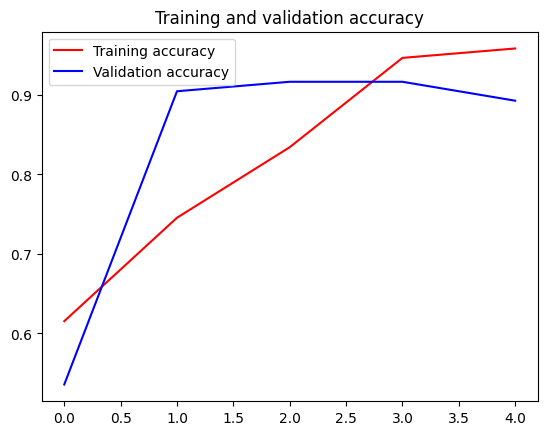

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()# plot the training and validation accuracy graph

In [ ]:
feature_train = model.predict(X_train)
feature_test = model.predict(X_test)

2/2 [==============================] - 46s 15s/step


In [ ]:
# Flatten extracted features
flat_train = feature_train.reshape(feature_train.shape[0], -1)
flat_test = feature_test.reshape(feature_test.shape[0], -1)

In [ ]:
print(flat_train.shape, flat_test.shape)

(103, 1000) (52, 1000)


In [ ]:
y_train_flattened=y_train.ravel()
y_test_flattened=y_test.ravel()